In [1]:
import nltk

In [2]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

The pos_tag() and tokenize() are for parts of speech tagging and to split a string into words or tokens.

In [2]:
from nltk.corpus import stopwords

In [4]:
stopwords.words('english')[0:500]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

The above increments the first 500 stopwords by 25.

The text data that will be used is unstructured format as binary, no delimiters, and no indication of rows.

In [6]:
rawData=open("SMSSpamCollection.tsv").read()

In [7]:
rawData[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

The above printed the first 500 strings of data as starting with ham or spam and also the \t or \n in the strings.

In [8]:
parsedData=rawData.replace('\t','\n').split('\n')

The above replaced the tabs with newline chars and then split on the newline char.

In [9]:
parsedData[0:5]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam']

The above gives the label and the string of each label.

In [10]:
labelList=parsedData[0::2]

The above starts at 0 and goes to the end grabbing every other one, or by 2 it increments from the list so that it grabs only the label from the list.

In [11]:
textList = parsedData[1::2]

The above starts at the 2nd value and skips every other one so that it grabs only the text string of each label.

In [12]:
print(labelList[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']


In [13]:
print(textList)[0:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobil

TypeError: 'NoneType' object is not subscriptable

In [3]:
import pandas as pd

In [15]:
fullCorpus = pd.DataFrame({'label':labelList[:-1],'body_list':textList})

There was an extra comma in the label list so it was removed, so that the two would align with each other.

In [16]:
fullCorpus.shape

(5574, 2)

In [17]:
fullCorpus.head


<bound method NDFrame.head of      label                                          body_list
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham              Will Ã¼ b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]>

In [18]:
print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


There is an empty label in the list of classes for spam and not spam as ham.

Reread in the file.

In [19]:
dataset=pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [20]:
dataset.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
fullCorpus=pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
fullCorpus.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
fullCorpus.columns=['label','body_text']
fullCorpus.head

<bound method NDFrame.head of      label                                          body_text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [23]:
print("Input data has {} rows and {} columns".format(len(fullCorpus),len(fullCorpus.columns)))

Input data has 5572 rows and 2 columns


In [24]:
print("Number of null in label: {}".format(fullCorpus["label"].isnull()))

Number of null in label: 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: label, Length: 5572, dtype: bool


In [25]:
print("Number of null in text: {}".format(fullCorpus['body_text'].isnull()))

Number of null in text: 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: body_text, Length: 5572, dtype: bool


There aren't any missing values in the label or text body of the data.

***


#### Regular Expressions
ex: 'nlp' searches for 'nlp' in any string
'[j-q]' returns a single char b/w j:q
'[j-q]+' returns any char b/w j:q returning >1 char
'[0-9]+' returns char strings of numeric values
'[j-q0-9]+' returns any char including j:q or 0-9 numeric with >1 char/num value returned

Regex are good to identify whitespace b/w words/tokens
- identify/create delimiters or eol escape chars
- remove punctuation/numbers from text
- cleaning html tags from text
- identify some text patterns of interest

Use cases:
- password confirmation criteria
- search URL for substrings
- search for files on computer
- document scraping



In [4]:
import re

In [27]:
re_test="This is a made up string to test 2 different regex methods"
re_test_messy="This     is a made up     string to test 2     different regex      methods."
re_test_messy1="This-is-a-made/up.string*to>>>> test----2" "" "" "different-regex-methods."

Split a sentence into a list of words

In [28]:
re.split('\s',re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [29]:
re.split('\s',re_test_messy)

['This',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 '',
 'different',
 'regex',
 '',
 '',
 '',
 '',
 '',
 'methods.']

In [30]:
re.split('\s+',re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods.']

In [31]:
re.split('\s+',re_test_messy1)

['This-is-a-made/up.string*to>>>>', 'test----2different-regex-methods.']

In [32]:
re.split('\W+',re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2different',
 'regex',
 'methods',
 '']

In the above the '\W+' matches any non-word char and splits the string based on those non-word chars

In [33]:
re.findall('\S+',re_test_messy1)

['This-is-a-made/up.string*to>>>>', 'test----2different-regex-methods.']

The capital S in \S+ above looks for 1 or more non-whitespace chars which includes special chars.

In [34]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods.']

In [35]:
re.findall('\w+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2different',
 'regex',
 'methods']

The above lowercase w in '\w+' will search for 1 or more chars that resemble words, ignoring special characters. 

The takeaways about regex in tokenizing:
    - findall()
    - split()
    
Useful regex for tokenizing:
    - \W and \w for words to split ignoring the special chars
    - \S and \s for splits string on single whitespace

### Other regex Methods

In [36]:
pep8_test = "I try to follow PEP8 guidelines."
pep7_test = "I try to follow PEP7 guidelines."
peep8_test = "I try to follow PEEP8 guidelines."


In [37]:
import re

In [38]:
re.findall('[a-z]+', pep8_test)

['try', 'to', 'follow', 'guidelines']

In [39]:
re.findall('[A-Z]+',pep8_test)

['I', 'PEP']

In [40]:
re.findall('[A-Z]+[0-9]+',pep8_test)

['PEP8']

In [41]:
re.sub('[A-Z]+[0-9]+','PEP8 Python style guidelines',pep8_test)

'I try to follow PEP8 Python style guidelines guidelines.'

In [42]:
pep8_test


'I try to follow PEP8 guidelines.'

Other regex functions in the 're' module:
    - re.search()
    - re.match()
    - re.fullmatch()
    - re.finditer()
    - re.escape()
    
### Steps to this NLP with python:
1. Raw text - model can't distinguish words
2. Tokenize - tell the model what to look for
3. clean text - remove stop words/punctuation, stemming, etc.
4. vectorize - convert to numeric form with each row a text and each column a word with 0,1 for binary
5. machine learning algorithm-fit/train model
6. spam filter - system to filter emails


***
***
***

### NLP basics: Implementing a pipeline to clean text
- **preprocessing** text data
    1. remove punctuation
    2. tokenize the words
    3. remove stopwords
    4. lemma/stem
    

In [43]:
import pandas as pd

In [44]:
pd.set_option('display.max_colwidth',100)

In [45]:
data= pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [46]:
data.columns=['label','body_text']

In [47]:
data.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


__Remove punctuation__

In [5]:
import string

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct


In [51]:
data['body_text_clean']=data['body_text'].apply(lambda x: remove_punct(x))

In [52]:
data.head()

,label,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


__Tokenization__

In [53]:
import re

In [54]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens

In [55]:
data['body_text_tokenized']=data['body_text_clean'].apply(lambda x:tokenize(x.lower()))

In [56]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


**Remove Stopwords**

In [57]:
import nltk

In [58]:
stopwords=nltk.corpus.stopwords.words('english')

In [59]:
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords]
    return text

In [60]:
data['body_text_nostop']=data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

In [61]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


***
***
***

### Supplemental Data Cleaning
__Stemming__:process of reducing inflected or somewhat derived words into their word stem or root. This crudely chops the end off of words to leave only the base.

Examples:
    - stemming/stemmed --> stem
    - electricity/electical --> electr
    - berries/berry --> berri
    - connection/connected/connective --> connect
    - meanness/meaning --> mean
    
Stemming  is useful for:
    - saving disk space
    - reducing the corpus of words the model is exposed to 
    - explicityly correlating words with similar meanings
    
Example stemmers in the nltk (natural language tool kit) package:
    - porter stemmer (most popular stemmer)
    - snowball stemmer
    - lancaster stemmer
    - regex-based stemmer
    
***
**Test out Porter Stemmer**


In [62]:
import nltk

In [63]:
ps = nltk.PorterStemmer()

In [64]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [65]:
print(ps.stem('grows'))

grow


In [66]:
print(ps.stem('growing'))

grow


In [67]:
print(ps.stem('grow'))

grow


In [68]:
print(ps.stem('run'))

run


In [69]:
print(ps.stem('running'))

run


In [70]:
print(ps.stem('runner'))

runner


**Read in raw text**

In [71]:
import pandas as pd
import re
import string

In [72]:
pd.set_option('display.max_colwidth',100)

In [73]:
stopwords=nltk.corpus.stopwords.words('english')

In [74]:
data=pd.read_csv('SMSSpamCollection.tsv', sep='\t')

In [75]:
data.columns=['label','body_text']

In [76]:
data.head()

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives around here though"
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...


**Clean up text**

In [77]:
def clean_text(text):
    text="".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [78]:
data['body_text_nostop']=data['body_text'].apply(lambda x: clean_text(x.lower()))

In [79]:
data.head()

,label,body_text,body_text_nostop
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send..."


**Stem text**

In [80]:
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

In [81]:
data['body_text_stemmed']=data['body_text_nostop'].apply(lambda x: stemming(x))

In [82]:
data.head()

,label,body_text,body_text_nostop,body_text_stemmed
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
3,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send...","[freemsg, hey, darl, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chg, send, 150..."


***
***
***

### Lemmatizing text

Process of grouping together the inflected forms of a word so they can be analyzed as a single term, identified by the word's lemma. Using vacabulary analysis of words aiming to remove inflectional endings to return the dictionary form of a word is another way to define lemmatization.

The goal is to condense derived words intheir base forms for both stemming and lemmatization.

1. Stemming is typically faster as it simply chops off the end of a word using heuristics with out any understanding of the context in which a word is used usually less accurate.
2. Lemmatizing is typically more accurate as it uses more informed analysis to create groups of words with similar meaning based on the context around the word, always returns a dictionary word, could be more computationally expensive.

**Using lemmatization**

In [21]:
import nltk

In [22]:
wn = nltk.WordNetLemmatizer()

The above is the most popular lemmatizer in the nltk package

In [23]:
ps=nltk.PorterStemmer()

In [24]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [87]:
print(ps.stem('meanness'))

mean


In [88]:
print(ps.stem('meaning'))

mean


In [89]:
print(wn.lemmatize('meanness'))

meanness


In [90]:
print(wn.lemmatize('meaning'))

meaning


In [91]:
print(ps.stem('goose'))

goos


In [92]:
print(ps.stem('geese'))

gees


In [93]:
print(wn.lemmatize('goose'))

goose


In [94]:
print(wn.lemmatize('geese'))

goose


**Read in raw text same as previous**

In [25]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth',100)
stopwords=nltk.corpus.stopwords.words('english')
data=pd.read_csv('SMSSpamCollection.tsv', sep='\t',header=None)
data.columns=['label','body_text']
data.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


**Clean up text same as previous**

In [26]:
def clean_text(text):
    text="".join([word for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[word for word in tokens if word not in stopwords]
    return text

In [27]:
data['body_text_nostop']=data['body_text'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,body_text,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


**Lemmatize cleaned text**

In [28]:
def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text


In [29]:
data['body_text_lemmatized']=data['body_text_nostop'].apply(lambda x: lemmatizing(x))
data.head()

,label,body_text,body_text_nostop,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"


In [30]:
lemmatizing('lives')

['l', 'i', 'v', 'e', 's']

In [101]:
print(wn.lemmatize('lives'))

life


In [102]:
print(wn.lemmatize('mobiles'))

mobile


**Lemmatizing** is more sophisticated and usually more accurate than **stemming** text, but can cost more time to run than stemmer. Stemmer chops off to get to root word with correlated words.

***
***
***

### Vectorizing Raw Data

**vectorizing** - the process of encoding text as integers to create feature vectors.

**feature vector** - an n-dim vector of numeric features that represents some object.

**document term matrix-dtm** - the numeric form with rows of text and columns of words for counts of number of times words are in that text, and the label to target.

**Types of vectorized dtms**:
    -**count-vectorization**
    -**n-grams**
    -**term frequency-inverse document frequency-TF-IDF**
    


### Count Vectorization

Vectorization that creates the dtm and counts each word occurence in each document
    - read in text, using porter stemmer, but could use the other stemmers optionally
    - use the same functions created earlier but drop the lambda, because count vectorizer allows its own method of cleaning and tokenizing data
    
    

In [31]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


### Apply Count Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
count_vect=CountVectorizer(analyzer=clean_text)
x_counts=count_vect.fit_transform(data['body_text'])
print(x_counts.shape)
print(count_vect.get_feature_names())

(5572, 8109)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [34]:
data_sample=data[0:20]

In [35]:
count_vect_sample=CountVectorizer(analyzer=clean_text)
x_counts_sample=count_vect_sample.fit_transform(data_sample['body_text'])
print(x_counts_sample.shape)
print(count_vect_sample.get_feature_names())


(20, 221)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'b', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'got', 'gota', 'grant', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joke', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lccltd', 'like', 'link',

**Vectorizers output sparse matrices** which are matrices of mostly zeros, 
only the location is stored of the nonzeros in the document term matrix.



In [36]:
x_counts_sample

<20x221 sparse matrix of type '<class 'numpy.int64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [37]:
x_counts_sample.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
x_counts_df=pd.DataFrame(x_counts_sample.toarray())

In [39]:
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x_counts_df.columns=count_vect_sample.get_feature_names()

In [41]:
print(x_counts_df)

    08002986030  08452810075over18  09061701461  1  100  100000  11  12  150  \
0             0                  0            0  0    0       0   0   0    0   
1             0                  0            0  0    0       0   0   0    0   
2             0                  1            0  0    0       0   0   0    0   
3             0                  0            0  0    0       0   0   0    0   
4             0                  0            0  0    0       0   0   0    0   
5             0                  0            0  0    0       0   0   0    1   
6             0                  0            0  0    0       0   0   0    0   
7             0                  0            0  0    0       0   0   0    0   
8             0                  0            1  0    0       0   0   1    0   
9             1                  0            0  0    0       0   1   0    0   
10            0                  0            0  0    0       0   0   0    0   
11            0                  0      

Most of the column names have been changed to their literal word instead of numeric storage locations, but some are still nonsense as shown above for the last few lines of code.

### N-gram vectorizing

N-grams create a dtm, but columns represent all combinations of adjacent words of length n in the text.

ex:
    1. bigram: 'nlp is','is an','an interesting','interesting topic'
    2. trigram: 'nlp is an','is an interesting','an interesting topic'
    3. four-gram: 'nlp is an interesting','is an interesting topic'
        
The model is tuned for best result, and as an aside: google uses n-gram vectorization.
    
**Read in the data the same as previously done for count-vectorization**
**Clean data with small modification:
    - n-grams needs a string passed to it to look for words 
    

In [42]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=" ".join([ps.stem(word) for word in tokens if word not in stopwords])#that is a space before '.join'
    return text


In [43]:
data['cleaned_text']=data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,body_text_nostop,body_text_lemmatized,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though


In the cleaned_text above the tokens are reconstructed back into a sentence without comma separated quoted words.

**N-gram uses count vectorizer** because it counts occurences of words or groups of adjacent words

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
n_gram_vect=CountVectorizer(ngram_range=(2,2))

In the above the (2,2), means only bigrams or two word pairs searched for, if it was (1,3) then uni, bi, and tri word pairs would be searched and returned.

In [46]:
x_counts=n_gram_vect.fit_transform(data['cleaned_text'])

In [47]:
print(x_counts.shape)

(5572, 31308)


In [48]:
print(n_gram_vect.get_feature_names())

['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q', '08000839402

In the above it should show some bigram word pairs, and does, but there is also a combination of the location of other words stored as numeric values returned in combination with a word or another numeric storage location.

In [49]:
data_sample=data[0:20]
data_sample

,label,body_text,body_text_nostop,body_text_lemmatized,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send...","[freemsg, hey, darling, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send,...",freemsg hey darl 3 week word back id like fun still tb ok xxx std chg send 150 rcv
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre...",per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...",winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl...
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ...",mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 0800298...


In [50]:
x20_counts=n_gram_vect.fit_transform(data_sample['cleaned_text'])

In [51]:
print(x20_counts.shape)

(20, 225)


In [52]:
x20_counts

<20x225 sparse matrix of type '<class 'numpy.int64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [53]:
len(n_gram_vect.get_feature_names())

225

In [54]:
n_gram_vect.get_feature_names()

['09061701461 claim',
 '100 20000',
 '100000 prize',
 '11 month',
 '12 hour',
 '150 rcv',
 '150pday 6day',
 '16 tsandc',
 '20000 pound',
 '2005 text',
 '21st may',
 '4txtú120 poboxox36504w45wq',
 '6day 16',
 '81010 tc',
 '87077 eg',
 '87077 trywal',
 '87121 receiv',
 '87575 cost',
 '900 prize',
 'aid patent',
 'alreadi say',
 'amor wat',
 'anymor tonight',
 'appli 08452810075over18',
 'appli repli',
 'around though',
 'avail bugi',
 'back id',
 'bless time',
 'breather promis',
 'brother like',
 'buffet cine',
 'bugi great',
 'call 09061701461',
 'call mobil',
 'caller press',
 'callertun caller',
 'camera free',
 'cash 100',
 'chanc win',
 'chg send',
 'cine got',
 'claim 81010',
 'claim call',
 'claim code',
 'click httpwap',
 'click wap',
 'co free',
 'code kl341',
 'colour mobil',
 'comp win',
 'copi friend',
 'cost 150pday',
 'crazi avail',
 'credit click',
 'cri enough',
 'csh11 send',
 'cup final',
 'custom select',
 'darl week',
 'date sunday',
 'dont miss',
 'dont think',
 'do

The above gives the 225 names of the sample of 20 text entries of bigrams, when ran after calling the latest data frame of the sample of the first 20 observations in our x20_counts data.

In [55]:
x20_counts.columns=n_gram_vect.get_feature_names()

In [56]:
x20_counts


<20x225 sparse matrix of type '<class 'numpy.int64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [57]:
x20_counts.columns

['09061701461 claim',
 '100 20000',
 '100000 prize',
 '11 month',
 '12 hour',
 '150 rcv',
 '150pday 6day',
 '16 tsandc',
 '20000 pound',
 '2005 text',
 '21st may',
 '4txtú120 poboxox36504w45wq',
 '6day 16',
 '81010 tc',
 '87077 eg',
 '87077 trywal',
 '87121 receiv',
 '87575 cost',
 '900 prize',
 'aid patent',
 'alreadi say',
 'amor wat',
 'anymor tonight',
 'appli 08452810075over18',
 'appli repli',
 'around though',
 'avail bugi',
 'back id',
 'bless time',
 'breather promis',
 'brother like',
 'buffet cine',
 'bugi great',
 'call 09061701461',
 'call mobil',
 'caller press',
 'callertun caller',
 'camera free',
 'cash 100',
 'chanc win',
 'chg send',
 'cine got',
 'claim 81010',
 'claim call',
 'claim code',
 'click httpwap',
 'click wap',
 'co free',
 'code kl341',
 'colour mobil',
 'comp win',
 'copi friend',
 'cost 150pday',
 'crazi avail',
 'credit click',
 'cri enough',
 'csh11 send',
 'cup final',
 'custom select',
 'darl week',
 'date sunday',
 'dont miss',
 'dont think',
 'do

In [58]:
x20_counts_df = pd.DataFrame(x20_counts.toarray())

In [59]:
x20_counts_df.columns=n_gram_vect.get_feature_names()

In [60]:
x20_counts_df.head()

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6day,16 tsandc,20000 pound,2005 text,...,wonder bless,wont take,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The above last few lines of code made the 20 sample document term matrix of bigrams into an array then data frame that the column names could be assigned of the bigrams. The first 5 of those 20 samples with the bigram header names is shown above.

### Term Frequency Inverse Document Frequency Vectorization

TF-IDF:
    term frequency of term i in document j multiplied by the log of the number of documents divided by the number of documents with term i in them.
    
    TF(i,j) X log(N/DF(i))
    
    Note: Large values for words that occur less but are specific to some documents, helps to distinguish some texts from others.

**Read in data with PorterStemmer**
no need to add the lambda function or the " ".join() in the def f() because TF-IDF vectorizer does this the same as count vectorizer on each row.



In [61]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text



## Apply TF-IDF Vectorizer


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [63]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(data['body_text'])
print(x_tfidf.shape)
print(tfidf_vect.get_feature_names())


(5572, 8109)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

The only difference between the count vectorizer and the tf-idf vectorizer is what is in the cells, because they are the same dimensions.

In [64]:
data_sample=data[0:20]

In [65]:
x20_tfidf=tfidf_vect.fit_transform(data_sample['cleaned_text'])

In [66]:
x20_tfidf.shape

(20, 221)

In [67]:
x20_tfidf.columns=tfidf_vect.get_feature_names()

In [68]:
x20_tfidf

<20x221 sparse matrix of type '<class 'numpy.float64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [69]:
x20_tfidf.columns

['08002986030',
 '08452810075over18',
 '09061701461',
 '1',
 '100',
 '100000',
 '11',
 '12',
 '150',
 '150pday',
 '16',
 '2',
 '20000',
 '2005',
 '21st',
 '3',
 '4',
 '4403ldnw1a7rw18',
 '4txtú120',
 '6day',
 '81010',
 '87077',
 '87121',
 '87575',
 '9',
 '900',
 'aid',
 'alreadi',
 'amor',
 'anymor',
 'appli',
 'around',
 'avail',
 'b',
 'back',
 'bless',
 'breather',
 'brother',
 'buffet',
 'bugi',
 'c',
 'call',
 'caller',
 'callertun',
 'camera',
 'cash',
 'chanc',
 'chg',
 'cine',
 'claim',
 'click',
 'co',
 'code',
 'colour',
 'comp',
 'copi',
 'cost',
 'crazi',
 'credit',
 'cri',
 'csh11',
 'cup',
 'custom',
 'darl',
 'date',
 'dont',
 'dun',
 'e',
 'earli',
 'eg',
 'eh',
 'england',
 'enough',
 'entitl',
 'entri',
 'even',
 'fa',
 'feel',
 'final',
 'fine',
 'free',
 'freemsg',
 'friend',
 'fulfil',
 'fun',
 'go',
 'goalsteam',
 'goe',
 'gonna',
 'got',
 'gota',
 'grant',
 'great',
 'help',
 'hey',
 'hl',
 'home',
 'hor',
 'hour',
 'httpwap',
 'id',
 'im',
 'info',
 'ive',
 'jac

In [70]:
x20_tfidf_df = pd.DataFrame(x20_tfidf.toarray())
x20_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.198423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198423,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [71]:
x20_tfidf_df.columns=tfidf_vect.get_feature_names()

In [72]:
x20_tfidf_df.head()

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.198423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198423,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


There are many large floats to 6 decimal spots in the above for the TF-IDF dtm. These could mean some words or tokens are more specific to a particular document or that the word occurs more frequent in its document than other documents. Meaning it could be a more relevant word seen in a certain type of document like a rating or topic.

The three vectorizers we just saw were the count vectorizer, the n-grams vectorizer, and the TF-IDF vectorizer. The n-grams vectorizer of the dtm will have a wider dtm than the count and tf-idf vectorized dtms, because it has multiple words in the number of n grams of words adjacent to each other to use.
The TF-IDF and count vectorizers have the same dtm dimensions but the count is a simple count of each word in each document, and the TF-IDF vectorizer uses a formula that puts more weight on the terms more frequent in a document making it possibly better at classifying the document by target of rating or topic.

***
***
***

### Feature Engineering

Feature engineering is where you create new features or transform existing features to get the most out of the data. 

Examples:
    - taking the root of a variable
    - taking the square, cube, etc. of a variable
    - taking the count of words or length of a document or observation as a new feature
    - taking the number or percent of the document filled with special characters in punctuation
    
**Standardizing Data**
    Standardizing the data will pull in the outliers that give a skewed long tail on the right or left of the mean, so that the data will be more symmetrical and makes the correlations between features stand out more

**Read in the text as before**


In [73]:
import pandas as pd
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')

In [74]:
data.columns=['label','body_text']

**Create feature for text message length**

In [75]:
data['body_length'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))

The above will count the characters while ignoring the white spaces.

In [76]:
data.head()

,label,body_text,body_length
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,U dun say so early hor... U c already then say...,39
3,ham,"Nah I don't think he goes to usf, he lives around here though",49
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,116


**Create feature for percent of text that is punctuation**

In [77]:
import string
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100


The above will return the percent of punctuation characters rounded to 3 and ignores the white space. The count object has to have a number when counting, hence the '1', won't work with the usual 'char for char in...'

In [78]:
data['punct%']=data['body_text'].apply(lambda x: count_punct(x))

In [79]:
data.head()

,label,body_text,body_length,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,116,6.9


**Evaluate the features just created**

c:\users\m\anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
c:\users\m\anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


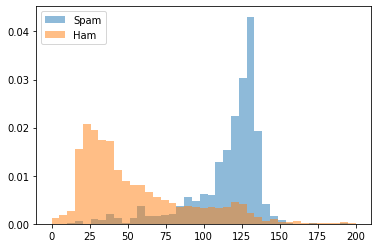

In [80]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins=np.linspace(0,200,40)#200 bins with a space amount of 40
pyplot.hist(data[data['label']=='spam']['body_length'], bins, alpha=0.5,normed=True, label='Spam')
pyplot.hist(data[data['label']=='ham']['body_length'],bins, alpha=0.5,normed=True, label='Ham')
pyplot.legend(loc='upper left')
pyplot.show()

The above histogram of the length of each review when comparing legit email labeled 'ham' to unwanted email labeled 'spam' shows that spam has more text centered around 125 words per document, while the ham email is skewed to the right with a long tail to the right where the median is likely compared to the mean at around 30 words per document.

Lets modify the bins and plot with a quarter the bins of above and the same amount of space as 40 to view the new feature of the percent of punctuation used in each review type of either spam or ham.

c:\users\m\anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
c:\users\m\anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


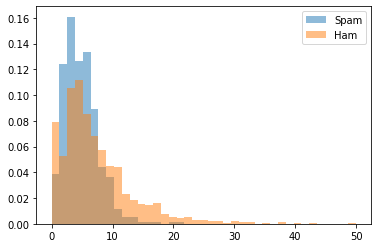

In [81]:
bins=np.linspace(0,50,40)
pyplot.hist(data[data['label']=='spam']['punct%'],bins,alpha=0.5,normed=True, label='Spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='Ham')
pyplot.legend(loc='upper right')
pyplot.show()

The above histogram shows that the amount of punctuation in spam is higher than in ham where more of the documents center at about 5. The percent for spam is about 13-16% and for ham the percent of punctuation per document is about 8-11% useage.

**Transformations**

Keep the two new features just created for 'body_length' and 'punct%' but this time plot the histogram of spam and ham with the body_length feature but without adding an alpha and without normalizing each feature. Also, add a chart title to this next histogram plot.

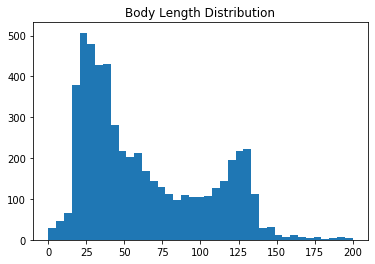

In [82]:
bins=np.linspace(0,200,40)
pyplot.hist(data['body_length'],bins)
pyplot.title("Body Length Distribution")
pyplot.show()

The above shows all the emails where the body length of every email of either spam or ham is shown as a 
distribution with a non-symmetric distribution having two peaks, one at around 25 and then another around 125.

Now lets plot the same distribution for the percent of punctuation in all the emails and see how it is displayed.

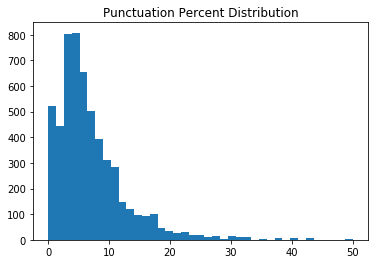

In [83]:
bins=np.linspace(0,50,40)
pyplot.hist(data['punct%'],bins)
pyplot.title("Punctuation Percent Distribution")
pyplot.show()

The punctuation percent in each document for all documents of either spam or ham is distributed with a center around 5 for about 800 of the documents, and skewed right with a long tail on the right, meaning the median is to the right of this center mean. The percent of punctuation isn't really a very informative feature compared to the body length of each document from what the distribution above shows.

### Box-Cox Power Transformation

A transformation will alter each data point, n, in a certain column or feature in a systematic way. 
If we were to take that right skewed distribution above and log transform it as was done when we normalized it as 
an option to the pyplot.hist(), then the center would be more symmetrical and outliers would be pulled to that center mean.

**Base Form (y^x)** for Box-Cox Transformation
- x = ['-2','-1','0.05','2']
- baseForm = ['y^-2','y^-1','y^(-1/2)','y^2']
- transformation = ['1/(y^2)','1/y','1/(sqrt(y))','y^2']
- origValue = ['50','50','50','50^2']
- TransformedValue = ['(1/2500)=0.0004', '(1/50)=0.02', '(1/sqrt(50))=0.14', '2500']



In [178]:
x = ['-2','-1','0.05','2']
baseForm = ['y^-2','y^-1','y^(-1/2)','y^2']
transformation = ['1/(y^2)','1/y','1/(sqrt(y))','y^2']
origValue = ['50','50','50','50^2']
TransformedValue = ['(1/2500)=0.0004', '(1/50)=0.02', '(1/sqrt(50))=0.14', '2500']
boxCox_df = pd.DataFrame([x,baseForm,transformation,origValue,TransformedValue])
BX = boxCox_df.T
BX.columns=['x','baseForm','transformation','origValue','TransformedValue']
BX

,x,baseForm,transformation,origValue,TransformedValue
0,-2,y^-2,1/(y^2),50,(1/2500)=0.0004
1,-1,y^-1,1/y,50,(1/50)=0.02
2,0.05,y^(-1/2),1/(sqrt(y)),50,(1/sqrt(50))=0.14
3,2,y^2,y^2,50^2,2500


The above data frame shows the Box-Cox transformations done to x.

**Transformation Process / Box-Cox (y^2)**

1. Determine what range of exponents to test.
2. Apply each transformation to each value of your chosen feature.
3. Use some criteria to determine which of the transformations yeild the best distribution.

Set up a for loop to apply the transformations. 
Pick the histogram from the transformations that looks more normal or centered with the least skew on either side.

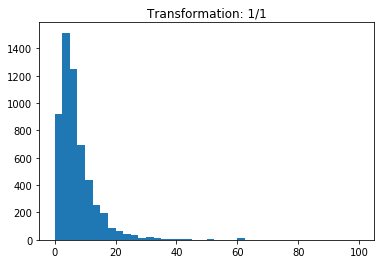

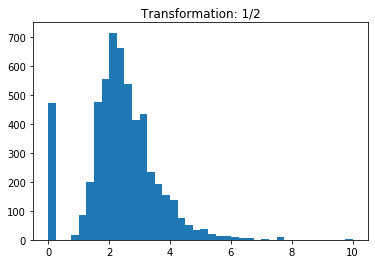

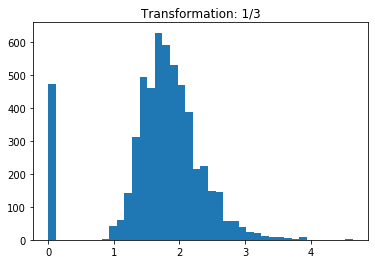

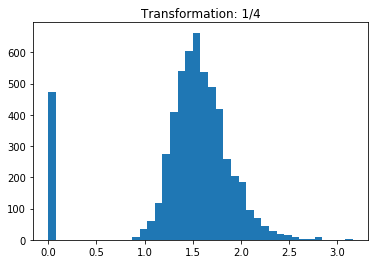

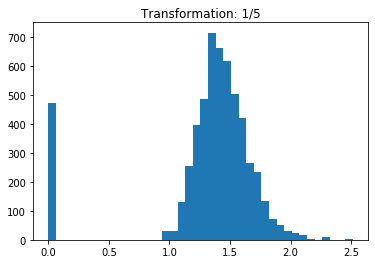

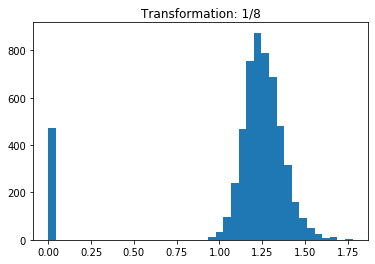

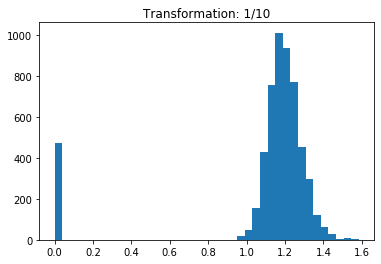

In [181]:
for i in [1,2,3,4,5,8,10]:
    pyplot.hist((data['punct%']**(1/i)), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()
    

The above shows that the number to raise the fractional power to could be 4 or 5. 
They are both skewed right slightly. But you can see the plots do get more normal in appearance the
higher the value of n and lower the fraction as a power. 

***
***
***

## Building Machine Learning Classifiers

**Machine Learning**
    The field of study that gives computers the ability to learn without 
    being explicitly programmers.-Arthur Samuel computer gaming 1959
    
    A computer program is said to learn from experience E with respect to some task T and some performance P 
    if its performance on T, as measured by P, improves with experience E. - Tom Mitchell 1998 CS Prof. at Carnegie Mtn.
    
    Algorithms that can figure out how to perform important tasks by generalizing from examples. - Univ. of WA, 2012
    
    Practice of using algorithms to parse data, larn from it, 
    and then make a determination or prediction about something in the world. -NVIDA 2016
    
    
**Two Broad Types of Machine Learning**

    1. **Supervised**
        inferring a function from labeled training data to make predictions on unseen data. Example: spam email predictor
            
    2. **Unsupervised**
        deriving structure from data where we don't know the effect of any of the variables.
        Example: based on content of email, group into similar emails in separate folders, i.e. vacations and not
            
**Hold out test set**
    sample of data set aside not used in training a model 
    for the purpose of evaluating the model's ability to generalize unseen data.
    
**K-fold Cross-Validation**
    The full data set is divided into k-subsets and the hold out method is repeated k times. Each time, 
    one of the k-subsets is used as the test set and the other k-1 subsets 
    are put together to be used to train the model.
    
    Example:
        10,000 samples split into 5 subsets, where in the 1st iteration, there are 4 subsets of the 5 as the training
        set and the other 1 subset of the five is the testing set put aside to predict the validity of the model 
        and return a score of accuracy. Then the 2nd iteration will take that set aside set into the training set of 4
        to train the next model and test on one of the other subsets put aside. and this repeats until every subset is 
        used as a testing set and four times as a part of the training set, with each iteration reporting its accuracy score.
        Then those scores are averaged out to get the accuracy of the model.
        
**Evaluation Metrics**
    
    - Accuracy = (number correct) / (number of errors in prediction)
    
    - Precision = (number correctly predicted as spam) / (number of correct and incorrect spam predicted)
    
    - Recall = (number of spam predicted either correct or incorrect) / (number of actual spam)
    
    Another way to distinguish between precision and recall:
        
        - How many selected items are relevant? (Precision)
        
        - How many relevant items are selected? (Recall)
        
    Note: If false positives are costly to a business, then optimize for precision (i.e. spam filter)
        and if false negatives are costly then optimize for recall (i.e. anti-malware). 
        
        If you only know the accuracy, you won't know the trade-off.

**Ensemble Method**
    
    Ensemble method of prediction in machine learning is a technique that creates multiple models 
    and then combines them to produce better results than any of the single models individually.
    It takes many models and puts them into one meta model of aggregated results to make a final prediction.

    
**Random Forest is an ensemble method**
    
    Random forest is an ensemble learning method that constructs a collection of decision trees and then
    aggregates the predictions of each tree to determine the final prediction.
       
        - example: 100 decision trees and all are independent with their own prediction. 
            The votes with the most in class is the final prediction result.

**Benefits of Ensemble Methods**

    - Can be used for classification or regression
    - Easily handles outliers, missing values, etc.
    - Accepts various types of inputs (continuous, ordinal, etc.)
    - less likely to overfit
    - outputs feature importance
    
    

## Building a Machine Learning Classifier with Ensemble Methods - Random Forest

This model will use the PorterStemmer() to clean the data and stem the words 
and the TF-IDF vectorizer for the document term matrix.

__Read in the data as before__
__Add in the length and punctuation percent features as before__
__Clean the text of stopwords and whitespace and make all lowercase as in pre-processing steps done earlier__



In [43]:
import nltk
import pandas as pd
import re

from sklearn.feature_extraction.text import TfidfVectorizer

import string


In [44]:
stopwords = nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

data=pd.read_csv("SMSSpamCollection.tsv",sep='\t')
data.columns=['label','body_text']

In [45]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100


In [46]:
data['body_length']=data['body_text'].apply(lambda x: len(x)-x.count(" "))
data['punct%']= data['body_text'].apply(lambda x: count_punct(x))

In [47]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [48]:
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])

In [49]:
x_tfidf_df=pd.DataFrame(x_tfidf.toarray())

In [50]:
x_tfidf_df.columns=tfidf_vect.get_feature_names()

In [51]:
#x_features = pd.concat([data['body_length'],data['punct%'],pd.DataFrame(x_tfidf.toarray())],axis=1)
x_features = pd.concat([data['body_length'],data['punct%'],x_tfidf_df],axis=1)

In [52]:
x_features.head()

,body_length,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***
***
***

## Explore Random Forest Classifier Attributes and Hyperparameters

Random Forest Classifier is built on relatively few full developed decision trees, 
which comes into play when comparing it to the gradient boosting tree stumps analogy.

List the methods of RandomForestClassifier of sklearn.ensemble

In [53]:
from sklearn.ensemble import RandomForestClassifier
print(dir(RandomForestClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


List the default settings and hyperparameters of RandomForestClassifier.

In [54]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


The important attributes of the RandomForestClassifier() are the **max_depth=None** that means 
it builds until some loss criteria is minimized or until it reaches a provided setting and
the **n_estimators=10** is the default of building 10 trees with unlimited depth.

The **feature_importances_** method of the RandomForestClassifier outputs the value of each feature to the model,
**fit** allows the model to be fit and saved, and **predict** allows predicting on the testing set with the fit model
that was saved.



## Explore RandomForestClassifier through Cross-Validation

In [55]:
from sklearn.model_selection import KFold, cross_val_score


Lets make the RandomForestClassifier run faster by building individual decision trees in parallel and keeping the defaults.

In [56]:
rf = RandomForestClassifier(n_jobs=-1)

In [57]:
k_fold=KFold(n_splits=5)

The above line of code will keep five observations in each set and train the models on all but one left out set of five.
Note that when using sklearn, it expects the target or label to be separated from the predictors table of features and split
before running the models on the training set and predicting on the testing set with the same indices.

In [16]:
cross_val_score(rf,x_features,data['label'], cv=k_fold, scoring='accuracy',n_jobs=-1)

array([0.97668161, 0.96947935, 0.97037702, 0.95152603, 0.96499102])

The above output array is the five results as ensemble results of running in parallel the decision trees to classify
the label as ham or spam according to the predictor features fed it. There are five results from five cross-validation
or folds that held one out while training a model on the 
other observations and testing on that held out one for five separate ones
that recorded the results after each run, and replacing the testing set or trading spots 
with one of the other sample sets
until all sample sets are the held out testing set and all 
testing sets are in the training set k-1 times.

The accuracy ranges from 95.7 to 97.7 percent accuracy with the RandomForestClassifier as shown above, but
results could be different if seed not set and it wasn't for this notebook.

## Building a Machine Learning Classifier: Random Forest on a hold out test set

Keep the same data read in, with the two added length and punctuation percent body features, and
the TF-IDF vectorized dtm.

### Explore RandomForestClassifer through Holdout Set



In [58]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


#### Split into the training and testing sets

This next line of code will split the data into the training and testing sets of the predictors and target, 
creating 4 dataframes. The training set will be 80% of the data and the testing set will be 20% of the remaining data.

In [59]:
X_train, X_test,y_train,y_test = train_test_split(x_features,data['label'],test_size=0.2)

The x_features table is the table we made earlier that is porter stemmed, cleaned up of stopwords and whitespace,
tf-idf vectorized, and the word names are added as feature labels on most, because some numeric storage values are
also in some label names of the tokens. 

In [60]:
from sklearn.ensemble import RandomForestClassifier


The RandomForestClassifier (RFC) can output feature importances mentioned earlier, htis is useful to see which columns or fields are important
to predicting spam and ham in email texts.

In [61]:
rf=RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

Next, we will use the feature importances to zip them to the model and sort from most to least important. 
The body_len feature will be in the list at the top as most important as well as the other feature columns
that are in the dtm as numeric.

In [62]:
y_pred=rf_model.predict(X_test)

In [63]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.04900510191043871, 'call'),
 (0.040633781246599394, 'body_length'),
 (0.03563849437771118, 'free'),
 (0.03528729939622158, 'txt'),
 (0.024283841293862726, 'mobil'),
 (0.023369694281818516, 'text'),
 (0.021670674966112538, 'stop'),
 (0.01964554253109703, 'prize'),
 (0.018943629326489034, 'claim'),
 (0.016028225877708184, '16')]

In [64]:
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')

The above sets the score on the parts of speech (pos) for precision, recall, fscore, and support for this RFC model.
It will print out four different values so it needs to have four values to store. The outputs will be in the order stored
i.e. precision, recall, fscore, and support


In [65]:
print(precision)
print(recall)
print(fscore)
print(support)

1.0
0.5813953488372093
0.7352941176470588
None


The precision is 100%, recall is 57.3%, the fscore is 72.9%, and there is no support.

This means all the predicted spam emails were correctly classified. 
But with the lower recall, this means that some emails were classified as spam that were actually good emails.

In [66]:
print('Precision: {} /Recall: {} /Accuracy: {}'.format(round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))

Precision: 1.0 /Recall: 0.581 /Accuracy: 0.935


***
***
***


## Random Forest with Grid Search

#### Changing hyperparameters with Grid Search

Grid search will put a grid together of every possible hyperparameter setting to find the best result. 
i.e. range of the number of estimators and range of the max depth to explore and 
fit the model with the best combination of those two features.

The reading in of the data, pre-processing, use of TF-IDF vectorization for the dtm, and
the added features is the same as previously created.


### Grid Search with a pre-built model

In [67]:
def train_RF(n_est, depth):
    rf=RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf.model=rf.fit(X_train,y_train),
    y_pred=rf_model.predict(X_test)
    precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
    print('Est:{}/Depth:{}====Precision:{}/Recall:{}/Accuracy:{}'.format(n_est,depth,round(precision,3), round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))
    

In [228]:
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        train_RF(n_est,depth)
        

Est:10/Depth:10====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:10/Depth:20====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:10/Depth:30====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:10/Depth:None====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:50/Depth:10====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:50/Depth:20====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:50/Depth:30====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:50/Depth:None====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:100/Depth:10====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:100/Depth:20====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:100/Depth:30====Precision:1.0/Recall:0.573/Accuracy:0.94
Est:100/Depth:None====Precision:1.0/Recall:0.573/Accuracy:0.94


The above didn't show any fluctuations in precision, recall or accuracy. The n_est and depth changed as set, but
none of the values changed.

***

Next, we will use the pre-processed and added features data, but also make two separate vectorized data frames of that data.
We will use the count and tf-idf vectorization dtms.


In [68]:
import nltk
import pandas as pd
import re
import string


In [69]:
stopwords = nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

data=pd.read_csv("SMSSpamCollection.tsv",sep='\t')
data.columns=['label','body_text']

In [70]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

In [71]:
data['body_length']=data['body_text'].apply(lambda x: len(x)-x.count(" "))
data['punct%']= data['body_text'].apply(lambda x: count_punct(x))

In [72]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(data['body_text'])
x_tfidf_feat=pd.concat([data['body_length'],data['punct%'],pd.DataFrame(x_tfidf.toarray())],axis=1)


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
x_count=count_vect.fit_transform(data['body_text'])
x_count_feat=pd.concat([data['body_length'],data['punct%'],pd.DataFrame(x_count.toarray())],axis=1)


**Exploring parameter settings using GridSearchCV**

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


Parameters will be a dictionary where keys are parameter names and values are the ranges. 

In [238]:
rf=RandomForestClassifier()
param={'n_estimators':[10,150,300], 'max_depth':[30,60,90,None]}


The param object above is the parameter grid for the GridSearchCV TF-IDF vectorized document term matrix below.

In [239]:
gs = GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs_fit = gs.fit(x_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,50.590521,1.295029,0.628951,0.082661,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977578,0.978475,0.973070,0.968582,0.973046,0.974152,0.003574,1
8,95.328807,12.269068,1.231094,0.804882,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976682,0.977578,0.973070,0.967684,0.972147,0.973434,0.003538,2
11,88.854471,2.107152,0.849353,0.103368,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977578,0.975785,0.973968,0.969479,0.968553,0.973075,0.003515,3
10,58.671758,7.116804,0.481440,0.076252,None,150,"{'max_depth': None, 'n_estimators': 150}",0.974888,0.980269,0.974865,0.967684,0.964960,0.972536,0.005508,4
4,39.531347,1.571477,0.495237,0.168260,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.974888,0.974888,0.972172,0.966786,0.972147,0.972177,0.002958,5


The following grid search object will be of the count vectorized dtm.

In [241]:
rf=RandomForestClassifier()
param={'n_estimators':[10,150,300],'max_depth':[30,60,90,None]}
gs2=GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs2_fit = gs2.fit(x_count_feat, data['label'])
pd.DataFrame(gs2_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,101.892452,3.011755,1.043389,0.251944,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975785,0.973991,0.974865,0.969479,0.972147,0.973254,0.002237,1
7,47.790309,3.839512,0.652533,0.118922,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976682,0.973094,0.973968,0.970377,0.971249,0.973075,0.002210,2
10,53.938030,1.729617,0.576349,0.134076,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978475,0.972197,0.973968,0.967684,0.969452,0.972357,0.003751,3
11,89.468977,2.815070,0.860487,0.186127,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975785,0.972197,0.974865,0.967684,0.971249,0.972357,0.002868,3
5,78.368026,4.475108,0.671413,0.092058,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.975785,0.974888,0.972172,0.967684,0.967655,0.971639,0.003451,5


Each of the above grid search object produces a linear combination of the 3 n_estimators 
and 4 max_depth values, so that 12 results are produced. Only the top five are returned with the [0:5] indexing.

Note: the fit time increases with the number of n_estimators. Using the count vectorizer, doesn't differ
    much from the TF-IDF vectorizer which is slightly better.
    
    In practice, much more testing would be done on more parameters using different stemmers, and vectorizors like
    the n-grams vectorizer, and different lemmatizers as well. It is not uncommon to test 100-1000 different models.

***
***
***


## Gradient Boosting Ensemble Method

**Ensemble Method** recap: technique that creates multiple models and combines them to produce better results than 
    any of the single models individually.
    
**Gradient Boosting**: Ensemble learning method that takes an iterative approach to combining weak learners
    to create a strong learner by focusing on mistakes of prior iterations. In other words, it puts more weight
    on the predictions that were wrong, analogous to a bunch of tree stumps rather than trees, repeatedly till the 
    error is minimized.
    
**Why use GB** when it takes longer to train?

pros:
    - it is much more powerful at better performing if tuned properly
    - accepts various types of input
    - can be used for classification or regression
    - outputs feature importance
cons:
    - longer to train because not parallelizeable
    - more likely to overfit because it obsesses over outliers
    - more difficult to tune because of more parameters
    
**RF** versus **GB**:
    
    1. RF:
        - bagging
        - training done in parallel
        - unweighted voting for final prediction
        - easier to tune, harder to overfit
        
    2. GB:
        - boosting
        - training done iteratively
        - weighted voted for final prediction
        - harder to tune and easier to overfit
        
    3. Both RF and GB:
        - ensemble method
        - Decision Tree based
        


For the Gradient Boosting grid search, we will use the TF-IDF vectorization with the same data and added features and
same preprocessing clean up of the text.


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
print(dir(GradientBoostingClassifier))


['_SUPPORTED_LOSS', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_initialized', '_check_params', '_clear_state', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_raw_predict', '_raw_predict_init', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score

The attributes and methods of GBC are almost identical to RFC in the fit, predict, and feature_importances_ attributes.

In [35]:
print(GradientBoostingClassifier())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


The default settings of GBC have n_estimators and max_depth, but the default isn't None as is the case with RFC, 
but 3 is the max_depth for GBC and 100 for n_estimators (not 10 like RFC).
Also, RFC has a couple fully grown trees with many hyperparameters built in settings, but GBC has many basic trees
that are analagous to tree stumps. They optimize differently because they are built differently. There is no n_jobs to
set to -1 in GBC and therefore it is slower because it cannot be made to run in parallel like RFC can. 
GBC is iterative based on last stored result with a learning rate of 0.01 for GBC. In RFC there isn't a learning rate
because RFC determines the performance and speed in training the RFC model.

***

## Build our own Grid Search in Gradient Boosting Classification Models


In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


In [37]:
X_train,X_test,y_train,y_test= train_test_split(x_features, data['label'],test_size=0.2)

In [38]:
def train_GB(n_est, max_depth,lr):
    gb=GradientBoostingClassifier(n_estimators=n_est, max_depth=max_depth, learning_rate=lr)
    gb_model=gb.fit(X_train,y_train)
    y_pred=gb_model.predict(X_test)
    precision,recall,fscore,support=score(y_test,y_pred, pos_label='spam',average='binary')
    print('Est:{}/Depth:{}/LR:{}---Precision:{}/Recall:{}/Accuracy:{}'.format(n_est,max_depth,lr,round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))
    

This next line of code will test our grid search model using Gradient Boosting and will take more than one hour to run.

In [259]:
for n_est in [50,100,150]:
    for max_depth in [3,7,11,15]:
        for lr in [0.01,0.1,1]:
            train_GB(n_est,max_depth,lr)
            

c:\users\m\anaconda2\envs\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est:50/Depth:3/LR:0.01---Precision:0.0/Recall:0.0/Accuracy:0.857
Est:50/Depth:3/LR:0.1---Precision:0.964/Recall:0.667/Accuracy:0.949
Est:50/Depth:3/LR:1---Precision:0.93/Recall:0.755/Accuracy:0.957
Est:50/Depth:7/LR:0.01---Precision:1.0/Recall:0.006/Accuracy:0.858
Est:50/Depth:7/LR:0.1---Precision:0.902/Recall:0.755/Accuracy:0.953
Est:50/Depth:7/LR:1---Precision:0.894/Recall:0.799/Accuracy:0.958
Est:50/Depth:11/LR:0.01---Precision:1.0/Recall:0.031/Accuracy:0.862
Est:50/Depth:11/LR:0.1---Precision:0.906/Recall:0.786/Accuracy:0.958
Est:50/Depth:11/LR:1---Precision:0.887/Recall:0.836/Accuracy:0.961


c:\users\m\anaconda2\envs\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est:50/Depth:15/LR:0.01---Precision:0.0/Recall:0.0/Accuracy:0.857
Est:50/Depth:15/LR:0.1---Precision:0.907/Recall:0.799/Accuracy:0.96
Est:50/Depth:15/LR:1---Precision:0.884/Recall:0.818/Accuracy:0.959
Est:100/Depth:3/LR:0.01---Precision:0.947/Recall:0.453/Accuracy:0.918
Est:100/Depth:3/LR:0.1---Precision:0.967/Recall:0.73/Accuracy:0.958
Est:100/Depth:3/LR:1---Precision:0.938/Recall:0.761/Accuracy:0.959
Est:100/Depth:7/LR:0.01---Precision:0.915/Recall:0.61/Accuracy:0.936
Est:100/Depth:7/LR:0.1---Precision:0.928/Recall:0.805/Accuracy:0.963
Est:100/Depth:7/LR:1---Precision:0.905/Recall:0.78/Accuracy:0.957
Est:100/Depth:11/LR:0.01---Precision:0.946/Recall:0.667/Accuracy:0.947
Est:100/Depth:11/LR:0.1---Precision:0.907/Recall:0.799/Accuracy:0.96
Est:100/Depth:11/LR:1---Precision:0.885/Recall:0.824/Accuracy:0.96
Est:100/Depth:15/LR:0.01---Precision:0.943/Recall:0.73/Accuracy:0.955
Est:100/Depth:15/LR:0.1---Precision:0.906/Recall:0.792/Accuracy:0.959
Est:100/Depth:15/LR:1---Precision:0.878/Rec

The above actually took longer than two hours to run. We see accuracy is approximately 96% on 
different trees, depth, and learning rates, but that recall is better with at least a learning rate of 1,
while precision does better with a learning rate that is .1 or .001. The number of trees and depth vary
within each as long as the learning rate is a 1 for recall or a .1 for precision or lower. These could 
be tuned better depending on whether you need better recall (decreasing the false negatives) or better
precision (increasing the true positives).

Common threads, learning rate of 0.01, very low max depth, and very low number of estimators.

#### Use the same TF-IDF and Count vectorized data frames on the added features, pre-processed data we have been using



***

## Evaluate Gradient-Boosting Model Performance

Keep the same data and the x_count_feat and x_tfidf_feat data frames made earlier to use the TF_IDF and Count
vectorized dtms.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [40]:
gb=GradientBoostingClassifier()
param={'n_estimators':[100,150],
      'max_depth':[7,11,15],
      'learning_rate':[0.1]}

gs=GridSearchCV(gb, param, cv=5, n_jobs=-1)

Note on the above for GBC, the n_jobs set to -1 doesn't run in paralled as the RFC does, but this setting
will train models on different subsets in parallel but not the entire model. And the kfold CV evaluates
with a hold out test set on every iteration trained.

In [80]:
cv_tfidf_fit= gs.fit(x_tfidf_feat, data['label'])
pd.DataFrame(cv_tfidf_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,365.557224,13.720350,0.639612,0.131438,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.963229,0.978475,0.970377,0.965889,0.968553,0.969305,0.005186,1
1,436.580036,36.176897,0.510697,0.132906,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.962332,0.978475,0.971275,0.964991,0.968553,0.969126,0.005580,2
3,684.709818,57.558545,0.513820,0.110570,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.962332,0.977578,0.968582,0.968582,0.967655,0.968946,0.004905,3
2,502.991793,23.412216,0.513149,0.127102,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.965022,0.978475,0.968582,0.966786,0.964960,0.968767,0.005036,4
5,945.226067,66.141233,0.523307,0.047726,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.965022,0.976682,0.968582,0.966786,0.966757,0.968767,0.004116,4


In [ ]:
cv_count_fit=gs.fit(x_count_feat, data['label'])

In [82]:
cv_count_fit

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [83]:
pd.DataFrame(cv_count_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,782.195916,39.112245,0.791742,0.258372,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.965919,0.976682,0.969479,0.964093,0.972147,0.969664,0.004484,1
5,883.608528,67.010183,0.482411,0.109201,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.964126,0.977578,0.970377,0.964991,0.971249,0.969664,0.004863,1
1,405.995752,3.167878,0.398700,0.029272,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.965919,0.979372,0.966786,0.964093,0.966757,0.968587,0.005483,3
0,287.514574,4.854254,0.416300,0.049956,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.965919,0.977578,0.967684,0.962298,0.967655,0.968228,0.005072,4
4,1024.867178,78.747237,0.671149,0.271772,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.965022,0.976682,0.966786,0.962298,0.970350,0.968228,0.004971,4


The above code can also take an hour or more to run. The time to process and run is greater for GBC than RFC.
The two were ran in the same block of code for TF-IDF then Count vectorized dtms.

*** 


### Machine Learning Pipeline: Model Selection Data Prep

1. Read in raw text
2. Clean text and tokenize it
3. Feature engineering
4. Fit a simple model
5. Tune hyperparameters and evaluate with GridSearchCV
6. Now...

**Final Model Selection**
    
**Bending the Rules a Bit**
- vectorizers should be fit on the training set and only be used to transform the test set 
    it only keeps the words in those documents.
- up to this point in NLP, the entire dataset was used to train the models 
    for GridSearch and not a hold out test set.
    
**Process**

1. Split the data into training and test sets
2. Train vectorizers on training set and use that to transform the training set
3. Fit best random forest model and best gradient boosting model on training set and predict
    on test set.
4. Thoroughly evaluate results of those two models to select the best model.

Read in the data, clean and pre-process it, add the new feature fields, then split into the
training and testing sets **before** vectorizing into the document term matrix, **dtm**.

### Split into training and testing sets

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data[['body_text','body_length','punct%']],data['label'],test_size=0.2)

### This vectorization is for TF-IDF on the training set.

In [85]:
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit=tfidf_vect.fit(X_train['body_text'])

tfidf_train=tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test=tfidf_vect_fit.transform(X_test['body_text'])



The index of old dataframe is kept when concatenating unless changed so that they match the new indices 
of the dtm indices from matrix to array to dataframe.


In [86]:
X_train_vect=pd.concat([X_train[['body_length','punct%']].reset_index(drop=True),pd.DataFrame(tfidf_train.toarray())],axis=1)

X_test_vect=pd.concat([X_test[['body_length','punct%']].reset_index(drop=True),pd.DataFrame(tfidf_test.toarray())],axis=1)

The above vectorized on the training set, then transformed the training set and testing set

In [87]:
X_train_vect.head()

,body_length,punct%,0,1,2,3,4,5,6,7,...,7177,7178,7179,7180,7181,7182,7183,7184,7185,7186
0,97,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,112,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Results Model Selection
Keep the data just made with the training and testing tf-idf vectorized dataframes.


### RFC using the TF-IDF vectorized training and testing dataframes

In [88]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time


In [89]:
rf=RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
start=time.time()
rf_model=rf.fit(X_train_vect,y_train)
end=time.time()
fit_time=(end-start)

In [90]:
start=time.time()
y_pred=rf_model.predict(X_test_vect)
end=time.time()
pred_time=(end-start)


In [91]:
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
print("Prediction:{}/Recall:{}/Accuracy:{}".format(round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))
print('Fit time:{}/Predict time:{}'.format(round(fit_time,3),round(pred_time,3)))


Prediction:0.985/Recall:0.859/Accuracy:0.978
Fit time:21.449/Predict time:0.616


***

## Use the GBC on the TF-IDF vectorized dataframes to Train/Test Model

In [92]:
gb=GradientBoostingClassifier(n_estimators=150,max_depth=11)
start=time.time()
gb_model=gb.fit(X_train_vect,y_train)
end=time.time()
fit_time=(end-start)


In [93]:
start=time.time()
y_pred=gb_model.predict(X_test_vect)
end=time.time()
pred_time=(end-start)


In [96]:
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
print('Fit time:{}/Predict time:{}/Precision:{}/Recall:{}/Accuracy:{}'.format(round(fit_time,3),round(pred_time,3),round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))


Fit time:532.558/Predict time:0.368/Precision:0.919/Recall:0.872/Accuracy:0.971


***
***
***


### Count Vectorization of Training set to test using RFC and GBC models

In [97]:
import nltk
import pandas as pd
import re
import string

In [98]:
stopwords = nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

data=pd.read_csv("SMSSpamCollection.tsv",sep='\t')
data.columns=['label','body_text']

In [99]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

In [100]:
data['body_length']=data['body_text'].apply(lambda x: len(x)-x.count(" "))
data['punct%']= data['body_text'].apply(lambda x: count_punct(x))

In [101]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [102]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data[['body_text','body_length','punct%']],data['label'],test_size=0.2)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
count_vect=CountVectorizer(analyzer=clean_text)
count_vect_fit=count_vect.fit(X_train['body_text'])

count_train=count_vect_fit.transform(X_train['body_text'])
count_test=count_vect_fit.transform(X_test['body_text'])

In [105]:
count_train_vect=pd.concat([X_train[['body_length','punct%']].reset_index(drop=True),pd.DataFrame(count_train.toarray())],axis=1)

count_test_vect=pd.concat([X_test[['body_length','punct%']].reset_index(drop=True),pd.DataFrame(count_test.toarray())],axis=1)

In [106]:
count_train_vect.head()

,body_length,punct%,0,1,2,3,4,5,6,7,...,7144,7145,7146,7147,7148,7149,7150,7151,7152,7153
0,90,7.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,13.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130,6.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,10.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,137,7.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [108]:
rf=RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
start=time.time()
rf_model=rf.fit(count_train_vect,y_train)
end=time.time()
fit_time=(end-start)

In [109]:
start=time.time()
y_pred=rf_model.predict(count_test_vect)
end=time.time()
pred_time=(end-start)

In [110]:
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
print("Prediction:{}/Recall:{}/Accuracy:{}".format(round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))
print('Fit time:{}/Predict time:{}'.format(round(fit_time,3),round(pred_time,3)))

Prediction:1.0/Recall:0.799/Accuracy:0.973
Fit time:21.097/Predict time:0.482


In [111]:
gb=GradientBoostingClassifier(n_estimators=150,max_depth=11)
start=time.time()
gb_model=gb.fit(count_train_vect,y_train)
end=time.time()
fit_time=(end-start)


In [112]:
start=time.time()
y_pred=gb_model.predict(count_test_vect)
end=time.time()
pred_time=(end-start)

In [114]:
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
print('Fit time:{}/Predict time:{}/Precision:{}/Recall:{}/Accuracy:{}'.format(round(fit_time,3),round(pred_time,3),round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))


Fit time:534.162/Predict time:0.632/Precision:0.915/Recall:0.866/Accuracy:0.971


***
***
***


### N-grams vectorization to test RFC and GBC models

In [136]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=" ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text


In [137]:
data['cleaned_text']=data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,body_length,punct%,cleaned_text
0,ham,Ok lar... Joking wif u oni...,24,25.0,ok lar joke wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,U dun say so early hor... U c already then say...,39,15.4,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,nah dont think goe usf live around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116,6.9,freemsg hey darl 3 week word back id like fun ...


In [138]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data[['body_text','body_length','punct%','cleaned_text']],data['label'],test_size=0.2)

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

In [140]:
n_gram_vect=CountVectorizer(ngram_range=(2,2))

In [141]:
n_gram_vect_fit=n_gram_vect.fit(X_train['cleaned_text'])


n_gram_train=n_gram_vect_fit.transform(X_train['cleaned_text'])
n_gram_test=n_gram_vect_fit.transform(X_test['cleaned_text'])

In [142]:
n_gram_train_df=pd.concat([X_train[['body_length','punct%','cleaned_text']].reset_index(drop=True),pd.DataFrame(n_gram_train.toarray())],axis=1)

n_gram_test_df=pd.concat([X_test[['body_length','punct%','cleaned_text']].reset_index(drop=True),pd.DataFrame(n_gram_test.toarray())],axis=1)


In [143]:
n_gram_train_df.head()

,body_length,punct%,cleaned_text,0,1,2,3,4,5,6,...,26030,26031,26032,26033,26034,26035,26036,26037,26038,26039
0,20,0.0,ugh got outta class,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,62,4.8,hi hope u get txtjourney hasnt gdnow 50 min la...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,131,12.2,hard true much show amp express love someoneth...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,100,6.0,urgent mobil award 1500 bonu caller prize 2760...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,109,9.2,stop wonder wow ever go stop tming tm whenev w...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [145]:
rf=RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
start=time.time()
rf_model=rf.fit(n_gram_train,y_train)
end=time.time()
fit_time=(end-start)

In [146]:
start=time.time()
y_pred=rf_model.predict(n_gram_test)
end=time.time()
pred_time=(end-start)

In [147]:
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
print("Prediction:{}/Recall:{}/Accuracy:{}".format(round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))
print('Fit time:{}/Predict time:{}'.format(round(fit_time,3),round(pred_time,3)))

Prediction:1.0/Recall:0.614/Accuracy:0.95
Fit time:2.668/Predict time:0.486


In [148]:
gb=GradientBoostingClassifier(n_estimators=150,max_depth=11)
start=time.time()
gb_model=gb.fit(n_gram_train,y_train)
end=time.time()
fit_time=(end-start)

In [149]:
start=time.time()
y_pred=gb_model.predict(n_gram_test)
end=time.time()
pred_time=(end-start)

In [151]:
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
print('Fit time:{}/Predict time:{}/Precision:{}/Recall:{}/Accuracy:{}'.format(round(fit_time,3),round(pred_time,3),round(precision,3),round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))


Fit time:25.612/Predict time:0.019/Precision:1.0/Recall:0.634/Accuracy:0.952


When comparing the two models of RFC to GBC, look at which ones perform better in recall, time, precision, and accuracy and decide which is better suited for your goals in classifying.

**Two Final Points**

In the example RFC has better precision which makes it better for spam filtering.
There could be other ways of feature engineering involving constraints that make the length > 500 or punctuation > 30%
as an example. Examine the messages the model is getting wrong to tune your model.

In terms of a business context, examine the results trade-off.

    - Is there going to be a bottleneck created from the prediction time?
    
    - Which to prioritize, recall or precision, as an example:
        - spam filtering is better to use precision
            because some good email getting classified as spam isn't going to ruin the whole system
        - anti-malware software is better for recall
            because you don't want any malicious code getting through and will sacrifice good code occasionally to 
            keep system safe.
            
This last section can be ran with different vectorization or stemming to compare each model. 
We used the TF-IDF vectorization, but could also use the n-grams or count vectorization used earlier to compare results.
